In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [11]:
# 多输入，对于wide部分和deep部分分别传入不同的训练特征
# 设置输入层
input_wide = keras.layers.Input(shape=[5])  # 指定输入形状，5维
input_deep = keras.layers.Input(shape=[6])  # 指定输入形状，6维

# 设置隐藏层
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# 连接输入层和隐藏层数据，设置输出层
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)

# 初始化模型，指定多输出层和输出层
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output])
        

# 编译模型，指定损失函数、优化器
model.compile(loss="mean_squared_error", optimizer="sgd")

# 指定回调函数
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

In [7]:
# 对训练集、验证集、测试集进行分割，针对不同输入层指定不同数据
x_train_scaled_wide = x_train_scaled[:, :5]  # 前五个特征
x_train_scaled_deep = x_train_scaled[:, 2:]  # 后六个特征
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

In [8]:
# 模型训练
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                   y_train, 
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8540 - val_loss: 0.8029
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5162 - val_loss: 0.6100
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4612 - val_loss: 0.4680
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4499 - val_loss: 0.4469
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4275 - val_loss: 0.4612
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4325
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4125 - val_loss: 0.4244
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4036 - val_loss: 0.4171
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3977 - val_loss: 0.4127
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3929 - val_lo

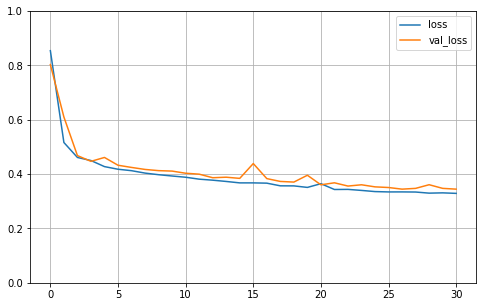

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [10]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test, verbose=0)

0.3400699496269226